
# **PROJECT FASHION-MNIST CLASSFICATION USING CNN** 

_**Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)**_

_**Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)**_

**IMPORTING THE LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras # to build Neural Network

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


**LOAD THE DATA**

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras

In [ ]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [ ]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0] #9 => Ankle boot

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

**SHOW IMAGE**

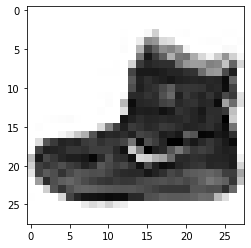

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

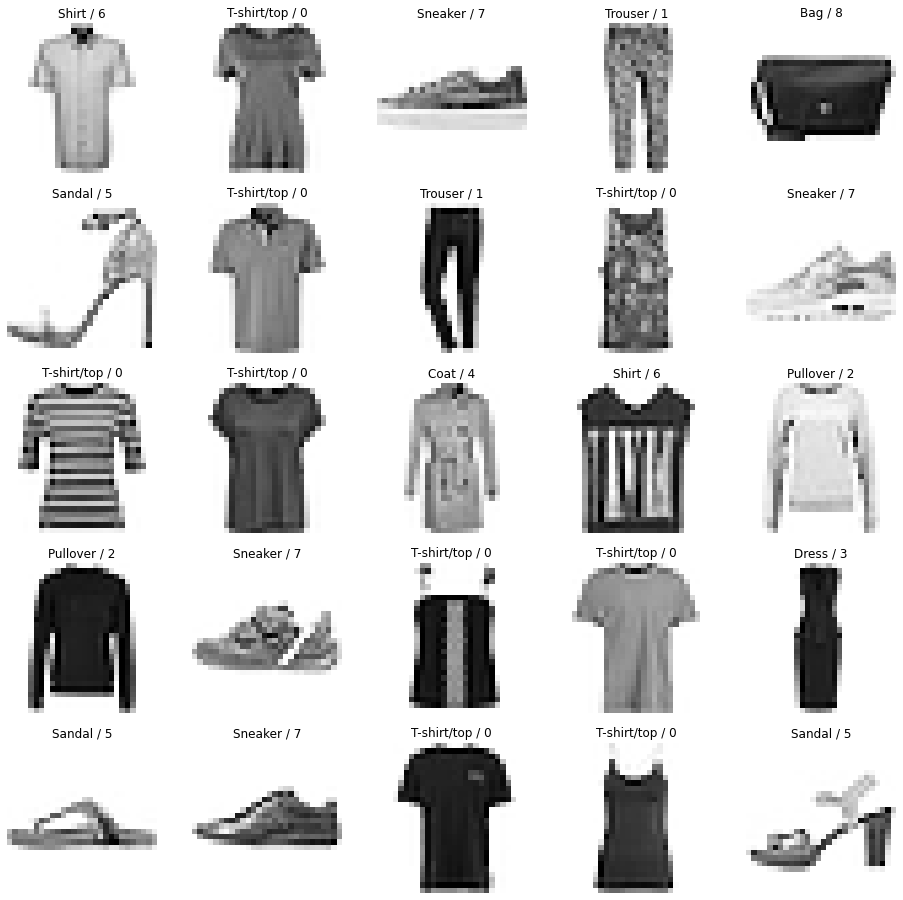

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))



**CHANGE DIMENSIONS**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [ ]:
X_train.ndim

4

 ### **FEATURE ENGINEEERING**

In [ ]:
X_train = X_train/255
X_test = X_test/255

### **SPLIT DATASET**

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [ ]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

### **CONVOLUTIONAL NEURAL NETWORK-MODEL BUILDING** 

In [ ]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
cnn_model.summary() # get the summary of model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 386us/step - loss: 0.6147 - accuracy: 0.7984 - val_loss: 0.4189 - val_accuracy: 0.8549
Epoch 2/10
48000/48000 [==============================] - 18s 385us/step - loss: 0.3731 - accuracy: 0.8693 - val_loss: 0.3785 - val_accuracy: 0.8667
Epoch 3/10
48000/48000 [==============================] - 18s 384us/step - loss: 0.3339 - accuracy: 0.8832 - val_loss: 0.3432 - val_accuracy: 0.8786
Epoch 4/10
48000/48000 [==============================] - 18s 383us/step - loss: 0.3030 - accuracy: 0.8932 - val_loss: 0.3192 - val_accuracy: 0.8887
Epoch 5/10
48000/48000 [==============================] - 18s 384us/step - loss: 0.2803 - accuracy: 0.9018 - val_loss: 0.3105 - val_accuracy: 0.8916
Epoch 6/10
48000/48000 [==============================] - 23s 482us/step - loss: 0.2645 - accuracy: 0.9063 - val_loss: 0.2935 - val_accuracy: 0.8978
Epoch 7/10
48000/48000 [==============================] 

### **TEST THE MODEL** 

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.15, 0.12, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 192us/step


[0.27160462305545807, 0.901199996471405]

### **VISUALIZE OUTPUT**

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off') """

"plt.figure(figsize=(16,16))\n\nj=1\nfor i in np.random.randint(0, 1000,25):\n  plt.subplot(5,5, j); j+=1\n  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')\n  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))\n  plt.axis('off') "

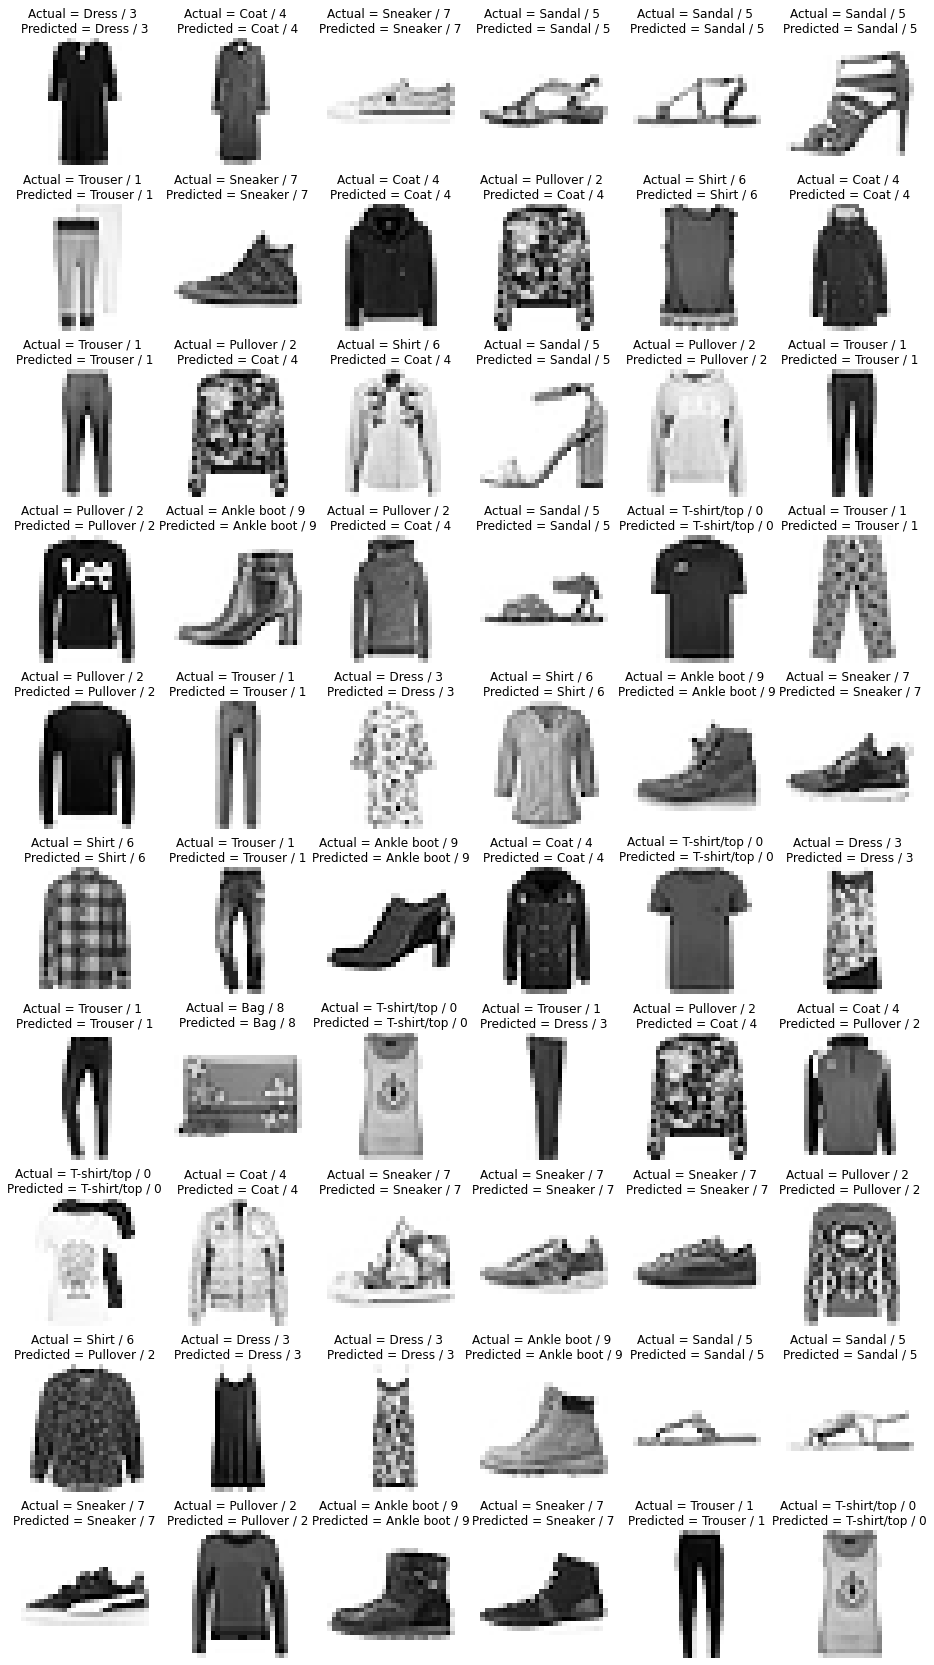

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

### **CONFUSION MATRIX**

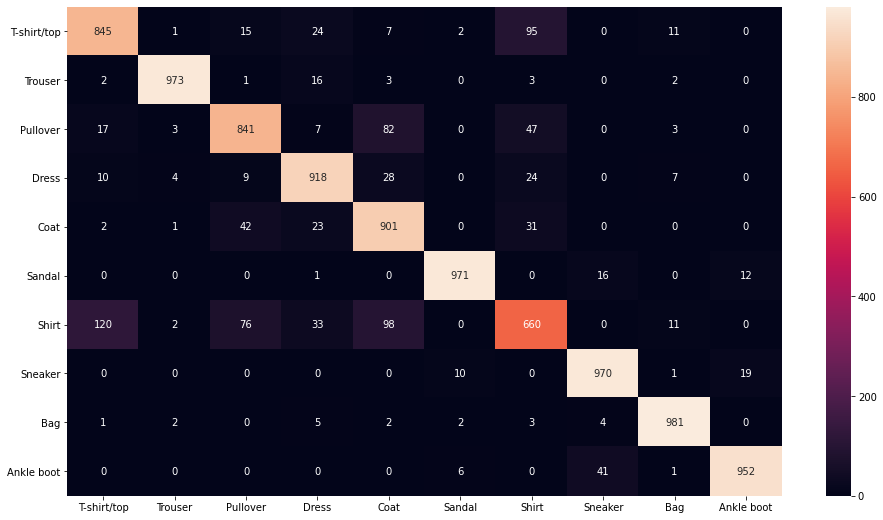

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.84      0.85      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.80      0.90      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.76      0.66      0.71      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### **SAVE MODEL** 

In [ ]:
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model

In [ ]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [ ]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.96]],
      dtype=float32)

In [ ]:
np.argmax(Y_pred_sample[0])

9

In [ ]:
y_test[0]

9

### **CONVOLUTIONAL NEURAL NETWORK-BUILDING COMPLEX MODEL** 

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 23s 486us/step - loss: 1.0128 - accuracy: 0.6195 - val_loss: 0.5780 - val_accuracy: 0.7695
Epoch 2/20
48000/48000 [==============================] - 23s 481us/step - loss: 0.5530 - accuracy: 0.7906 - val_loss: 0.4560 - val_accuracy: 0.8282
Epoch 3/20
48000/48000 [==============================] - 23s 484us/step - loss: 0.4642 - accuracy: 0.8274 - val_loss: 0.4016 - val_accuracy: 0.8476
Epoch 4/20
48000/48000 [==============================] - 26s 552us/step - loss: 0.4102 - accuracy: 0.8476 - val_loss: 0.3689 - val_accuracy: 0.8619
Epoch 5/20
48000/48000 [==============================] - 24s 510us/step - loss: 0.3716 - accuracy: 0.8631 - val_loss: 0.3508 - val_accuracy: 0.8683
Epoch 6/20
48000/48000 [==============================] - 23s 483us/step - loss: 0.3420 - accuracy: 0.8737 - val_loss: 0.3248 - val_accuracy: 0.8813
Epoch 7/20
48000/48000 [==============================] 

In [ ]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

**very complex model**

In [ ]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 50s 1ms/step - loss: 1.1998 - accuracy: 0.5339 - val_loss: 0.6296 - val_accuracy: 0.7542
Epoch 2/50
48000/48000 [==============================] - 50s 1ms/step - loss: 0.5992 - accuracy: 0.7753 - val_loss: 0.4805 - val_accuracy: 0.8176
Epoch 3/50
48000/48000 [==============================] - 50s 1ms/step - loss: 0.4961 - accuracy: 0.8137 - val_loss: 0.4188 - val_accuracy: 0.8445
Epoch 4/50
48000/48000 [==============================] - 50s 1ms/step - loss: 0.4367 - accuracy: 0.8409 - val_loss: 0.3821 - val_accuracy: 0.8597
Epoch 5/50
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3832 - accuracy: 0.8639 - val_loss: 0.3553 - val_accuracy: 0.8659
Epoch 6/50
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3471 - accuracy: 0.8761 - val_loss: 0.3307 - val_accuracy: 0.8817
Epoch 7/50
48000/48000 [==============================] - 54s 1ms/st

In [ ]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [ ]:
cnn_model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 368us/step


[0.48882474107004237, 0.9065999984741211]

In [ ]:
#End

Ab milenge next tutorial me,Tab tak ke liye SIKHATE SIKHATE kuch IMPLEMENT karte raho, Thank You.....-:)